In [37]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from matplotlib.animation import FuncAnimation

from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':20})
rc('text', usetex=True)

0.006666666666666657


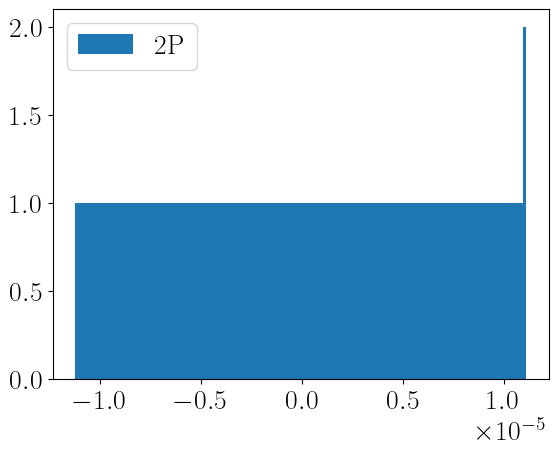

In [54]:
system = Ps_system(N_atoms = 1,N_bins = 150)
rabi0 = 2*np.pi*(400e-3)
chirp = 2*np.pi*(50e-3)
detuning = 0
direction = 1
pulse_duration = 5

laser_guess = {"label":"laser","order":0,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : pulse_duration,"unit_wavevector":direction,"start":0,"end":int(3*pulse_duration),"notch":0}
system.init_pulse(laser_guess)
system.init_pulse_cycle()
system.init_distribution_constant()
system.init_states_ground()

laser = system.laserDict[0][1]
system.create_composite(laser)
envelope = lambda t,args: rabi0*np.sinc(t-laser.tcentre)
phase = lambda t,args: omega0 



psi0 = qt.tensor(qt.Qobj(system.initial_pop),qt.basis(system.internal_dims,0))
result = qt.sesolve(H=system.H,psi0=psi0,tlist=laser.tlist,e_ops=system.e_ops)

fig,ax = plt.subplots()
#system.organise_result_expect(result)
#print(np.asarray(result.expect).shape)
print()
#ax.hist(system.velocity_bins, system.velocity_bins,np.asarray(result.expect)[0:150,0],label="1S")
ax.hist(system.velocity_bins, system.velocity_bins,np.asarray(result.expect)[150:300,0],label="2P")
plt.legend()

# why are both excited and ground states populated at the start ?????